# Stock Prediction using RNN's

### Loading the required Libraries

In [1]:
import numpy as np
import string as str
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

### Loading the Data

In [2]:
data = pd.read_csv('C:/Users/LEGION/Downloads/GOOG.csv', index_col='Date', parse_dates=['Date'])
#data.head()
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,133.360001,134.110001,132.770004,133.639999,133.639999,16409900
2023-11-14,135.649994,137.240005,135.100006,135.429993,135.429993,22317300
2023-11-15,136.639999,136.839996,135.330002,136.380005,136.380005,15840900
2023-11-16,136.960007,138.880005,136.080002,138.699997,138.699997,17615100
2023-11-17,137.820007,138.000000,135.479996,136.940002,136.940002,25565300


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4847 entries, 2004-08-19 to 2023-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4847 non-null   float64
 1   High       4847 non-null   float64
 2   Low        4847 non-null   float64
 3   Close      4847 non-null   float64
 4   Adj Close  4847 non-null   float64
 5   Volume     4847 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 265.1 KB


In [4]:
len(data)

4847

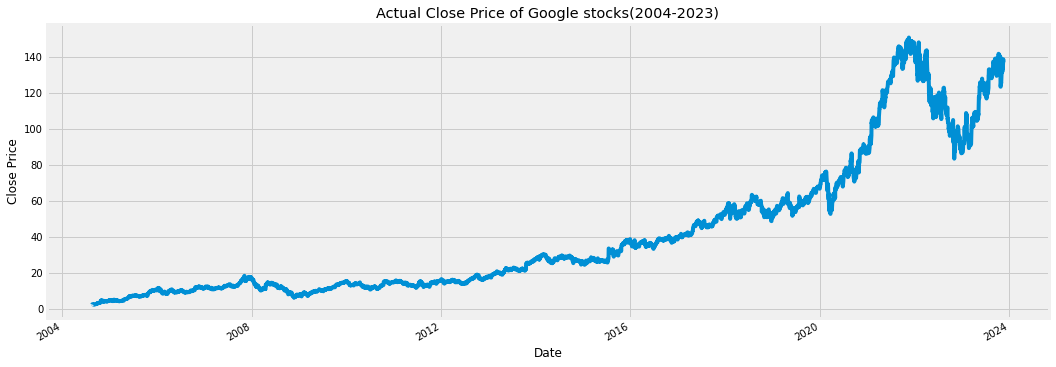

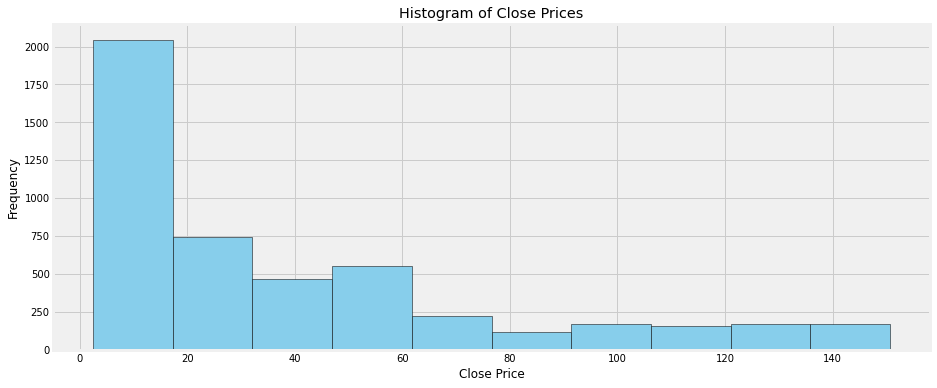

In [5]:
data["Close"].plot(figsize=(16, 6))
plt.title("Actual Close Price of Google stocks(2004-2023)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()
# Plotting a histogram
plt.figure(figsize=(14, 6))
plt.hist(data["Close"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Displaying the division of data into Training and Test set over time

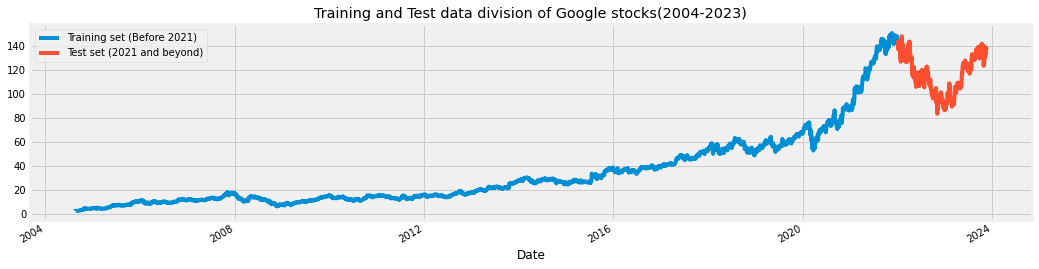

In [6]:
# We have chosen 'Close' attribute for prices. Let's see what it looks like
data["Close"][:'2021'].plot(figsize=(16,4),legend=True)
data["Close"]['2022':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2021)','Test set (2021 and beyond)'])
plt.title('Training and Test data division of Google stocks(2004-2023)')
plt.show()



In [7]:
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4605

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.54588186e-05],
       [1.39474206e-03],
       [1.57790459e-03],
       ...,
       [9.03324923e-01],
       [9.18977479e-01],
       [9.07103119e-01]])

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([5.54588186e-05, 1.39474206e-03, 1.57790459e-03, 8.16681705e-04,
       1.00656406e-03, 1.32752354e-03, 1.03177016e-03, 3.36085838e-04,
       3.96577781e-04, 4.03324596e-05, 2.52061005e-04, 0.00000000e+00,
       2.63827450e-04, 3.84818082e-04, 3.86498039e-04, 8.93979963e-04,
       1.25862507e-03, 1.92911004e-03, 2.01480808e-03, 2.34584731e-03,
       2.93735406e-03, 3.25158697e-03, 2.99616605e-03, 3.08690396e-03,
       3.49692814e-03, 3.33056518e-03, 3.06674448e-03, 4.51189199e-03,
       5.22102272e-03, 4.97232163e-03, 5.47308373e-03, 5.88982099e-03,
       6.44603516e-03, 6.22926674e-03, 6.52669333e-03, 6.33849093e-03,
       5.92343362e-03, 6.28303886e-03, 6.87117895e-03, 7.05602144e-03,
       7.41058681e-03, 8.25919444e-03, 8.05418572e-03, 6.80228048e-03,
       8.29616024e-03, 1.21694999e-02, 1.46850634e-02, 1.37440379e-02,
       1.44447688e-02, 1.56765011e-02, 1.52295178e-02, 1.61352508e-02,
       1.59403285e-02, 1.54025939e-02, 1.42313536e-02, 1.16519315e-02,
     

# Using LSTM Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

regressor = Sequential()

# # add first layer with dropout

regressor.add(LSTM(units=50,activation="relu", return_sequences=True, input_shape=(x_train.shape[1],1)))
#regressor.add(BatchNormalization())
regressor.add(Dropout(0.2))

# # add second layer

regressor.add(LSTM(units=60,activation="relu", return_sequences=True))
#regressor.add(BatchNormalization())
regressor.add(Dropout(0.2))

# # add third layer

regressor.add(LSTM(units=80,activation="relu", return_sequences=True))
#regressor.add(BatchNormalization())
regressor.add(Dropout(0.2))

# # add fourth layer

regressor.add(LSTM(units=120,activation="relu"))
#regressor.add(BatchNormalization())
regressor.add(Dropout(0.2))

# # the output layer
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')



In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [12]:
# Train the model
regressor.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
143/143 [==============================] - 15s 86ms/step - loss: 0.0082
Epoch 2/50
143/143 [==============================] - 12s 85ms/step - loss: 0.0032
Epoch 3/50
143/143 [==============================] - 12s 81ms/step - loss: 0.0027
Epoch 4/50
143/143 [==============================] - 12s 82ms/step - loss: 0.0028
Epoch 5/50
143/143 [==============================] - 12s 81ms/step - loss: 0.0025
Epoch 6/50
143/143 [==============================] - 12s 83ms/step - loss: 0.0021
Epoch 7/50
143/143 [==============================] - 12s 83ms/step - loss: 0.0020
Epoch 8/50
143/143 [==============================] - 12s 84ms/step - loss: 0.0019
Epoch 9/50
143/143 [==============================] - 12s 84ms/step - loss: 0.0019
Epoch 10/50
143/143 [==============================] - 12s 86ms/step - loss: 0.0019
Epoch 11/50
143/143 [==============================] - 12s 84ms/step - loss: 0.0017
Epoch 12/50
143/143 [==============================] - 12s 85ms/step - loss: 0.0017
E

In [13]:
# Create the testing data set
2 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("The RMSE when using LSTM network is :-",rmse)

8/8 [==============================] - 1s 27ms/step
The RMSE when using LSTM network is :- 5.355018236923045


C:\Users\LEGION\AppData\Local\Temp\ipykernel_16632\1652237224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


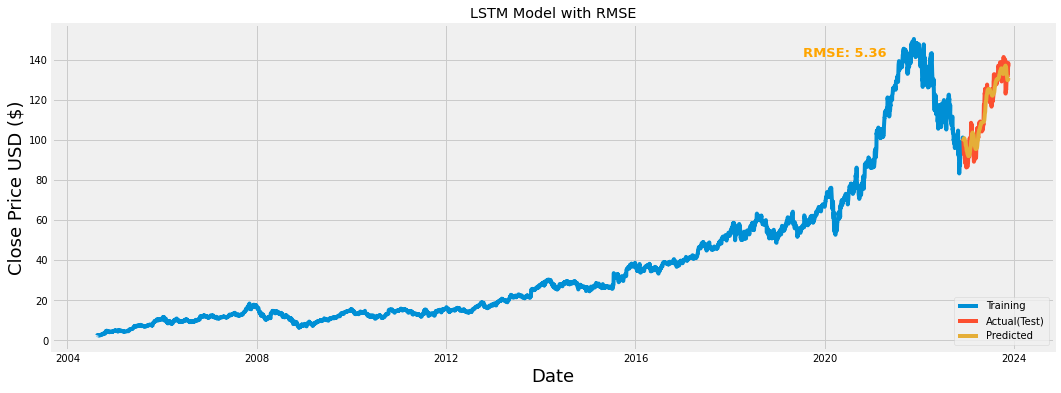

In [14]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data and RMSE
plt.figure(figsize=(16,6))
plt.title('LSTM Model with RMSE')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Training', 'Actual(Test)', 'Predicted'], loc='lower right')

# Add RMSE as a text annotation
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=13, color='orange', weight ='bold')

plt.show()





## Close Price comparison between Actual and Predicted

In [15]:
valid

,Close,Predictions
Date,,
2022-12-02,100.830002,99.441353
2022-12-05,99.870003,99.841202
2022-12-06,97.309998,100.243843
2022-12-07,95.150002,100.617989
2022-12-08,93.949997,100.915184
...,...,...
2023-11-13,133.639999,130.117935
2023-11-14,135.429993,130.222549
2023-11-15,136.380005,130.445786


### Better view of the Predicted Model

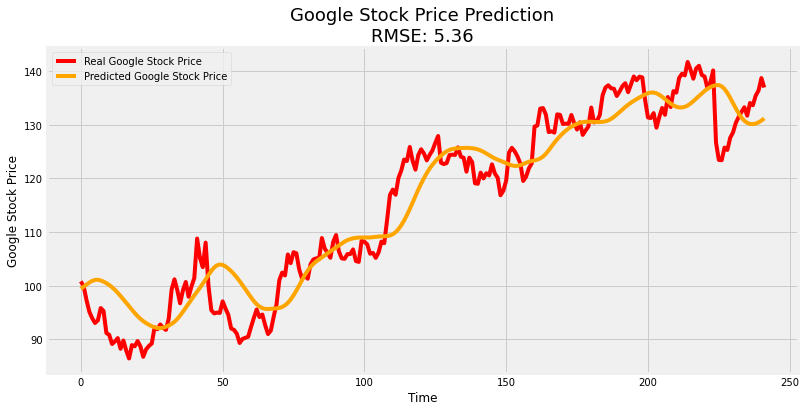

In [16]:
# def plot_predictions(test,predicted):
#     plt.plot(test, color='red',label='Real Google Stock Price')
#     plt.plot(predicted, color='orange',label='Predicted Google Stock Price')
#     plt.title('Google Stock Price Prediction')
#     plt.xlabel('time')
#     plt.ylabel('Google Stock Price')
#     plt.legend()
#     plt.show()
# plot_predictions(y_test,predictions)

def plot_predictions(test, predicted, rmse=None):
    plt.figure(figsize=(12, 6))

    # Plot actual stock prices
    plt.plot(test, color='red', label='Real Google Stock Price')

    # Plot predicted stock prices
    plt.plot(predicted, color='orange', label='Predicted Google Stock Price')

    # Add RMSE as text in the plot
    if rmse is not None:
        plt.title(f'Google Stock Price Prediction\nRMSE: {rmse:.2f}', fontsize=18)
    else:
        plt.title('Google Stock Price Prediction', fontsize=18)

    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

# Call the function with RMSE
plot_predictions(y_test, predictions, rmse)


# Using GRU Network

In [17]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout

regressor_gru = Sequential()

# add first GRU layer with dropout
regressor_gru.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
regressor_gru.add(Dropout(0.2))

# add second GRU layer with dropout
regressor_gru.add(GRU(units=60, return_sequences=True, activation='tanh'))
regressor_gru.add(Dropout(0.2))

# add third GRU layer with dropout
regressor_gru.add(GRU(units=80, return_sequences=True, activation='tanh'))
regressor_gru.add(Dropout(0.2))

# add fourth GRU layer with dropout
regressor_gru.add(GRU(units=120, activation='tanh'))
regressor_gru.add(Dropout(0.2))

# output layer
regressor_gru.add(Dense(units=1))

# Compile the model
regressor_gru.compile(optimizer='rmsprop',loss='mean_squared_error')

# Train the model
regressor_gru.fit(x_train, y_train, batch_size=32, epochs=50)



Epoch 1/50
143/143 [==============================] - 14s 64ms/step - loss: 0.0049
Epoch 2/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0025
Epoch 3/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0019
Epoch 4/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0018
Epoch 5/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0017
Epoch 6/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0015
Epoch 7/50
143/143 [==============================] - 9s 65ms/step - loss: 0.0014
Epoch 8/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0015
Epoch 9/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0013
Epoch 10/50
143/143 [==============================] - 9s 64ms/step - loss: 0.0012
Epoch 11/50
143/143 [==============================] - 9s 65ms/step - loss: 0.0013
Epoch 12/50
143/143 [==============================] - 9s 65ms/step - loss: 0.0012
Epoch 13/50


In [18]:
regressor_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 60)            20160     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 80)            34080     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 gru_3 (GRU)                 (None, 120)              

In [19]:
# Create the testing data set
test_data_gru = scaled_data[training_data_len - 60:, :]
x_test_gru = []

# Create the data sets x_test and y_test
for i in range(60, len(test_data_gru)):
    x_test_gru.append(test_data_gru[i-60:i, 0])

# Convert the data to a numpy array
x_test_gru = np.array(x_test_gru)

# Reshape the data
x_test_gru = np.reshape(x_test_gru, (x_test_gru.shape[0], x_test_gru.shape[1], 1))

# Get the models predicted price values
predictions_gru = regressor_gru.predict(x_test_gru)
predictions_gru = scaler.inverse_transform(predictions_gru)

# Get the root mean squared error (RMSE)
rmse_gru = np.sqrt(np.mean(((predictions_gru - y_test) ** 2)))
#rmse_gru
print("The RMSE when using GRU network is :-",rmse_gru)


8/8 [==============================] - 1s 17ms/step
The RMSE when using GRU network is :- 4.083131934686538


C:\Users\LEGION\AppData\Local\Temp\ipykernel_16632\2446099753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_gru['Predictions'] = predictions_gru


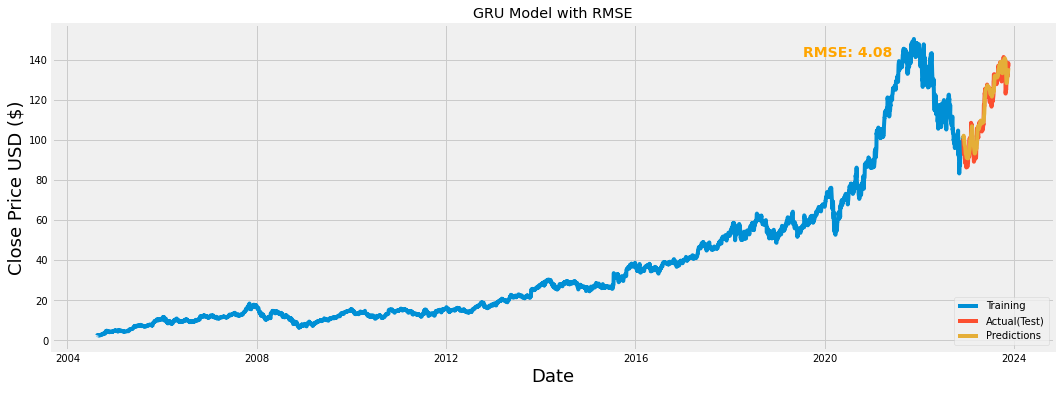

In [20]:
# Plot the data
train = data[:training_data_len]
valid_gru = data[training_data_len:]
valid_gru['Predictions'] = predictions_gru

# Visualize the data and RMSE
plt.figure(figsize=(16,6))
plt.title('GRU Model with RMSE')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_gru[['Close', 'Predictions']])
plt.legend(['Training', 'Actual(Test)', 'Predictions'], loc='lower right')

# Add RMSE as a text annotation
plt.annotate(f'RMSE: {rmse_gru:.2f}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=14, color='orange', weight='bold')

plt.show()


# Close price comparison between Actual and Predicted

In [21]:
valid_gru

,Close,Predictions
Date,,
2022-12-02,100.830002,100.801277
2022-12-05,99.870003,101.543709
2022-12-06,97.309998,102.163353
2022-12-07,95.150002,102.334763
2022-12-08,93.949997,101.916710
...,...,...
2023-11-13,133.639999,133.295670
2023-11-14,135.429993,133.913788
2023-11-15,136.380005,134.541534


### Better view of the Predicted Model

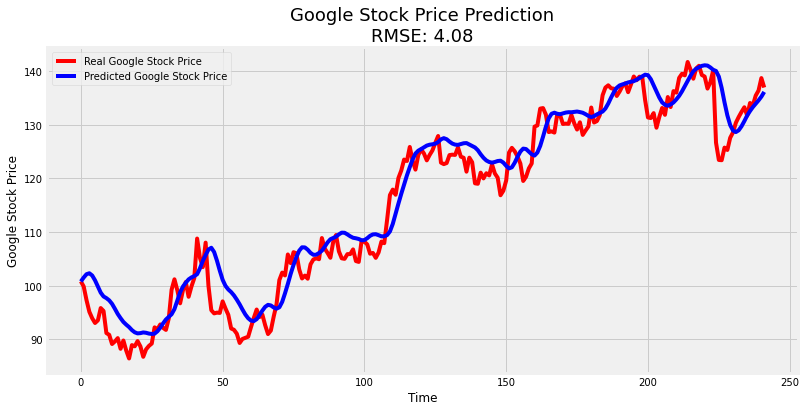

In [22]:
def plot_predictions(test, predicted, rmse=None):
    plt.figure(figsize=(12, 6))

    # Plot actual stock prices
    plt.plot(test, color='red', label='Real Google Stock Price')

    # Plot predicted stock prices
    plt.plot(predicted, color='blue', label='Predicted Google Stock Price')

    # Add RMSE as text in the plot
    if rmse is not None:
        plt.title(f'Google Stock Price Prediction\nRMSE: {rmse:.2f}', fontsize=18)
    else:
        plt.title('Google Stock Price Prediction', fontsize=18)

    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

# Call the function with RMSE
plot_predictions(y_test, predictions_gru, rmse_gru)


# Model Comparison

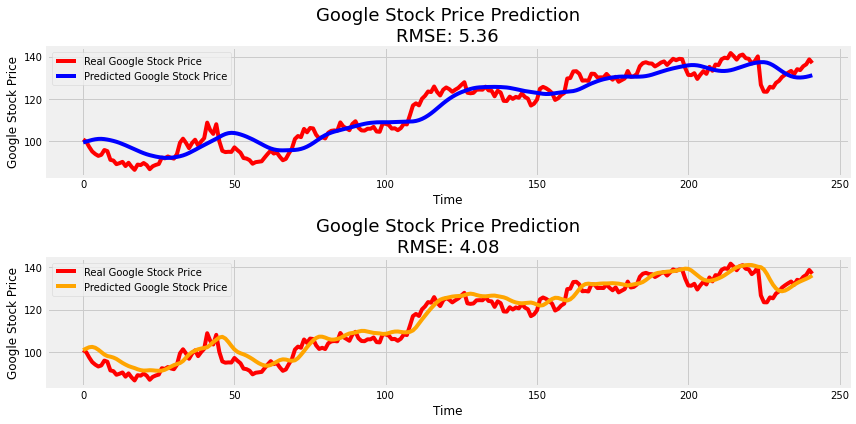

In [23]:
def plot_predictions(test, predicted, rmse=None, color='orange'):
    plt.plot(test, color='red', label='Real Google Stock Price')
    plt.plot(predicted, color=color, label='Predicted Google Stock Price')

    if rmse is not None:
        plt.title(f'Google Stock Price Prediction\nRMSE: {rmse:.2f}', fontsize=18)
    else:
        plt.title('Google Stock Price Prediction', fontsize=18)

    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()


# Plot LSTM predictions
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_predictions(y_test, predictions, rmse, color='blue')

# Plot GRU predictions
plt.subplot(2, 1, 2)
plot_predictions(y_test, predictions_gru, rmse_gru, color='orange')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


C:\Users\LEGION\AppData\Local\Temp\ipykernel_16632\362990747.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
C:\Users\LEGION\AppData\Local\Temp\ipykernel_16632\362990747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_gru['Predictions'] = predictions_gru


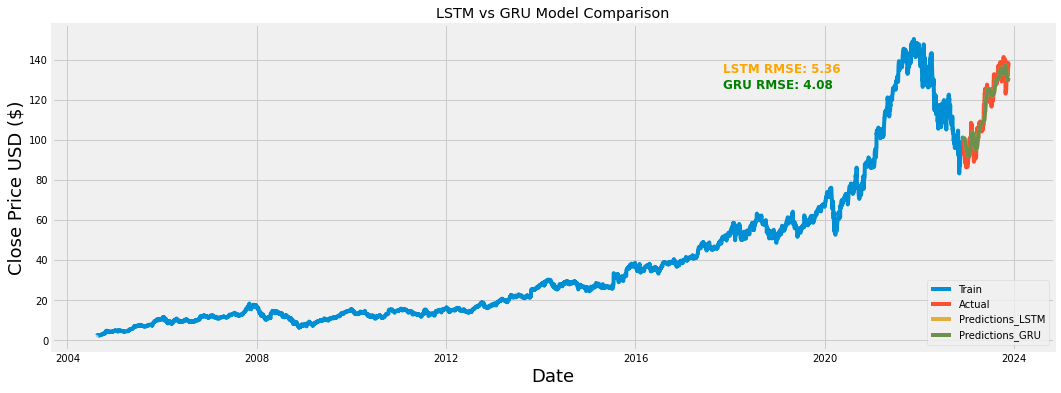

In [24]:

# Get the root mean squared error (RMSE) for LSTM and GRU
rmse_lstm = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse_gru = np.sqrt(np.mean(((predictions_gru - y_test) ** 2)))

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid_gru['Predictions'] = predictions_gru

# Visualize the data, LSTM predictions, GRU predictions, and RMSE
plt.figure(figsize=(16, 6))
plt.title('LSTM vs GRU Model Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot actual values
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions', 'Predictions']], label=['Actual', 'Predictions_LSTM', 'Predictions_GRU'])

# Add RMSE values as text annotations
plt.annotate(f'LSTM RMSE: {rmse_lstm:.2f}', xy=(0.67, 0.85), xycoords='axes fraction', fontsize=12, color='orange',weight='bold')
plt.annotate(f'GRU RMSE: {rmse_gru:.2f}', xy=(0.67, 0.80), xycoords='axes fraction', fontsize=12, color='green',weight="bold")

plt.legend(loc='lower right')
plt.show()


# Calculating the Mean Bias Error

In [25]:
# Calculate Mean Bias Error (MBE) for LSTM
mbe_lstm = np.mean(predictions - y_test)

# Calculate Mean Bias Error (MBE) for GRU
mbe_gru = np.mean(predictions_gru - y_test)

# Print MBE values
print("MBE for LSTM: {:.2f}".format(mbe_lstm))
print("MBE for GRU: {:.2f}".format(mbe_gru))


# Calculate MAPE for LSTM
mape_lstm = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE) for LSTM: ", mape_lstm)

# Calculate MAPE for GRU
mape_gru = np.mean(np.abs((y_test - predictions_gru.flatten()) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE) for GRU: ", mape_gru)

MBE for LSTM: 0.26
MBE for GRU: 1.67
Mean Absolute Percentage Error (MAPE) for LSTM:  16.438492858225246
Mean Absolute Percentage Error (MAPE) for GRU:  17.0898645365201


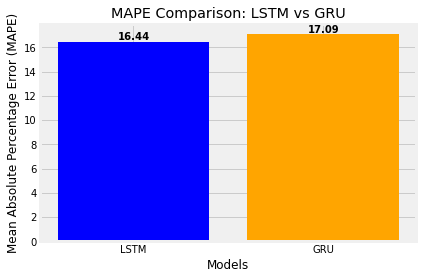

In [26]:
import matplotlib.pyplot as plt

# Plotting MAPE for LSTM and GRU
models = ['LSTM', 'GRU']
mape_values = [mape_lstm, mape_gru]

fig, ax = plt.subplots()
bars = ax.bar(models, mape_values, color=['blue', 'orange'])

# Displaying MAPE values at the center of each bar
for bar, value in zip(bars, mape_values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}', ha='center', va='bottom',weight='bold')

plt.xlabel('Models')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('MAPE Comparison: LSTM vs GRU')
plt.show()


# Methodology 

In [27]:
from graphviz import Digraph

# Create a Digraph object
flowchart = Digraph(comment='Stock Price Prediction Flowchart', format='png')

# Add nodes and edges
flowchart.node('A', 'Start', color='green')
flowchart.node('B', 'Load Data')
flowchart.node('C', 'Data Preprocessing')
flowchart.node('D', 'Create Training Data')
flowchart.node('E', 'Build LSTM Model', color ='darkred')
flowchart.node('F', 'Train LSTM Model')
flowchart.node('G', 'Create Testing Data', color ='darkblue')
flowchart.node('H', 'Predict with LSTM')
flowchart.node('I', 'Evaluate LSTM Model')
flowchart.node('J', 'Build GRU Model',color='darkred')
flowchart.node('K', 'Train GRU Model')
flowchart.node('L', 'Predict with GRU')
flowchart.node('M', 'Evaluate GRU Model')
flowchart.node('N', 'Display Results')
flowchart.node('O', 'End')

flowchart.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI','IN','NO', 'DJ', 'JK', 'KG','GL','LM','MN', 'NO'])

flowchart.render('flowchart', format='png', cleanup=True, directory='C:/Users/LEGION/Downloads/', engine='dot')


print("Flowchart generated and saved as flowchart.png")


Flowchart generated and saved as flowchart.png


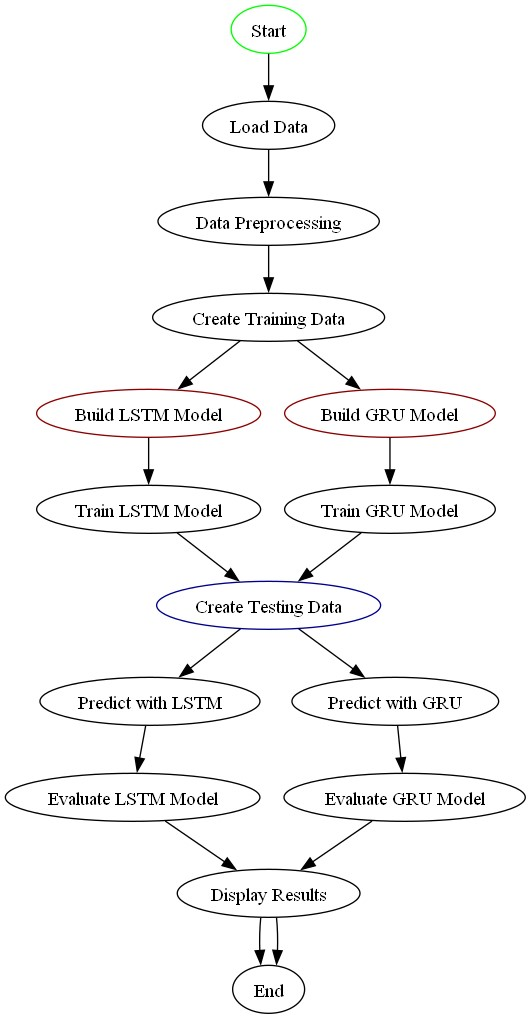